plots of SOG model run
- 1100 x 10 x 101 domain
- 1 day
- Neumann boundary conditions; know that function is called, but is it working?

In [1]:
import os
import re
import netCDF4 as nc

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
f=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_SOG_01_River/SOG2D_1h_20141019_20141019_ptrc_T.nc')
f2=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_SOG_01_River/SOG2D_1h_20141019_20141019_grid_T.nc')
fkeys=f.variables.keys()
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
z=f.variables[zkey][:]
t=f.variables['time_counter'][:]
xx,zz=np.meshgrid(lons,-z[:])
tt,tz=np.meshgrid(t,-z[:])
xt,yt=np.meshgrid(lons,lats)

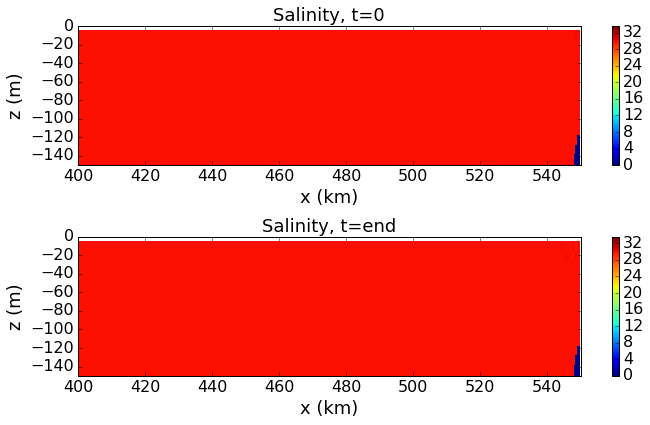

In [3]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
mesh0=axs[0].pcolormesh(xx,zz,f2.variables['vosaline'][0,:,5,:])
cb0=fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)', fontsize=18)
axs[0].set_xlabel('x (km)', fontsize=18)
axs[0].set_title('Salinity, t=0', fontsize=18)
#axs[0].autoscale(tight='True')
#axs[0].axis([0, 550, -50, 0])
axs[0].axis([400, 550, -150, 0])
plt.setp(axs[0].get_xticklabels(),fontsize=16)
plt.setp(axs[0].get_yticklabels(),fontsize=16)
cb0.ax.tick_params(labelsize=16)

mesh1=axs[1].pcolormesh(xx,zz,f2.variables['vosaline'][-1,:,5,:])
cb1=fig.colorbar(mesh1,ax=axs[1])
axs[1].set_ylabel('z (m)', fontsize=18)
axs[1].set_xlabel('x (km)', fontsize=18)
axs[1].set_title('Salinity, t=end', fontsize=18)
#axs[1].autoscale(tight='True')
#axs[1].axis([0, 550, -50, 0])
axs[1].axis([400, 550, -150, 0])
plt.setp(axs[1].get_xticklabels(),fontsize=16)
plt.setp(axs[1].get_yticklabels(),fontsize=16)
cb1.ax.tick_params(labelsize=16)
plt.tight_layout()

In [4]:
A=np.sum(f2.variables['vosaline'][-1,:,:,1090:1099])
print(A)
B=np.sum(f2.variables['vosaline'][0,:,:,1090:1099])
print(B)
print((A-B)/B*100,'%')

26998.7
27000.0
-0.0047309029469 %


In [5]:
print(f2.variables['vosaline'][0,10:20,5,15])

[ 30.00000191  30.00000381  30.00000381  30.00000381  30.00000381
  30.00000381  30.00000381  30.00000572  30.00000572  30.00000572]


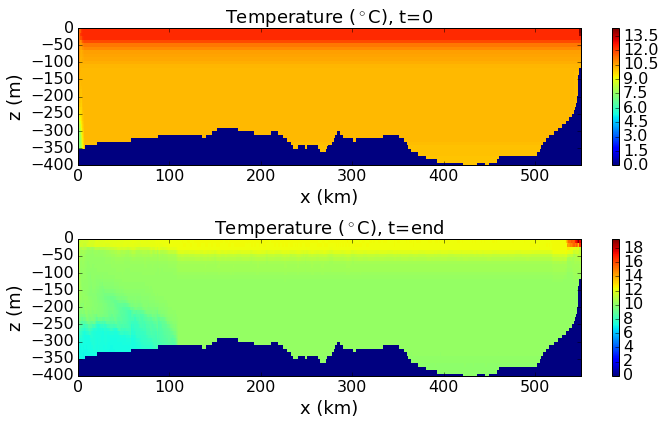

In [6]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
mesh0=axs[0].pcolormesh(xx,zz,f2.variables['votemper'][0,:,5,:])
cb0=fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)', fontsize=18)
axs[0].set_xlabel('x (km)', fontsize=18)
axs[0].set_title('Temperature ($^\circ$C), t=0', fontsize=18)
#axs[0].autoscale(tight='True')
axs[0].axis([0, 550, -400, 0])
plt.setp(axs[0].get_xticklabels(),fontsize=16)
plt.setp(axs[0].get_yticklabels(),fontsize=16)
cb0.ax.tick_params(labelsize=16)

mesh1=axs[1].pcolormesh(xx,zz,f2.variables['votemper'][-1,:,5,:])
cb1=fig.colorbar(mesh1,ax=axs[1])
axs[1].set_ylabel('z (m)', fontsize=18)
axs[1].set_xlabel('x (km)', fontsize=18)
axs[1].set_title('Temperature ($^\circ$C), t=end', fontsize=18)
#axs[1].autoscale(tight='True')
axs[1].axis([0, 550, -400, 0])
plt.setp(axs[1].get_xticklabels(),fontsize=16)
plt.setp(axs[1].get_yticklabels(),fontsize=16)
cb1.ax.tick_params(labelsize=16)
plt.tight_layout()

NO3
NH4
Si
PHY2
PHY
MYRI
MICZ
DOC
POC
bSi
O2


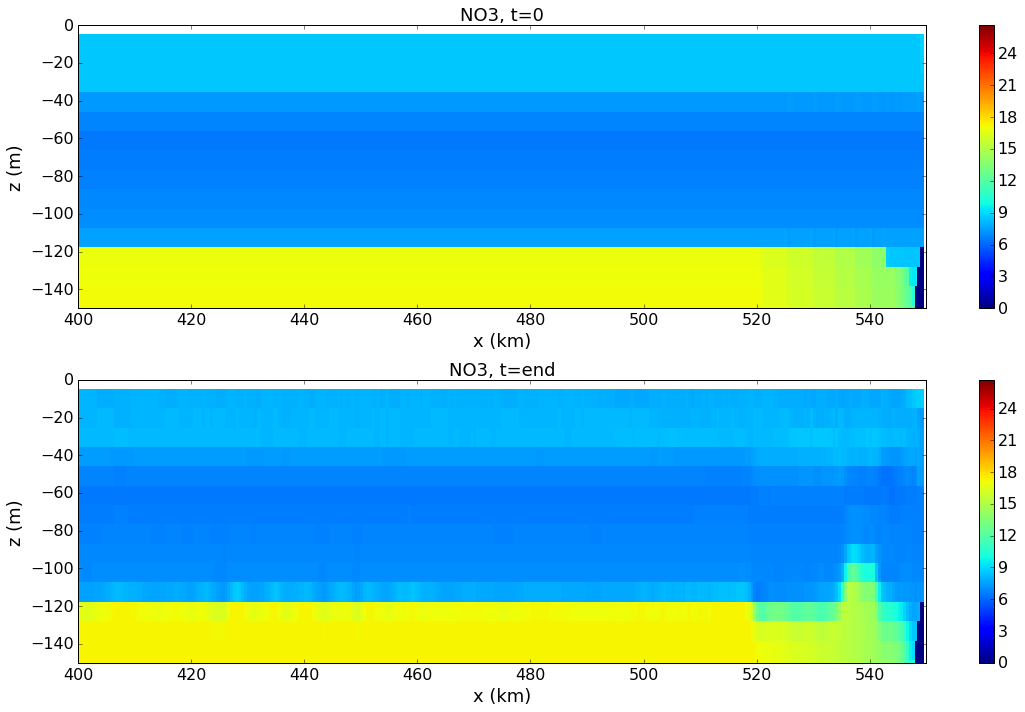

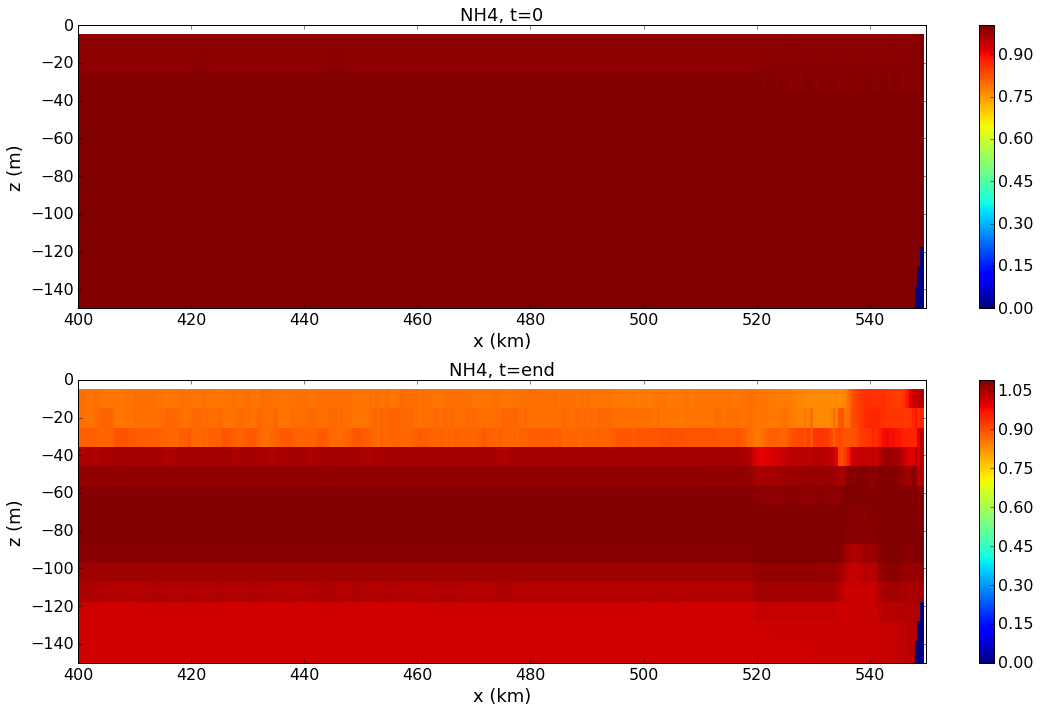

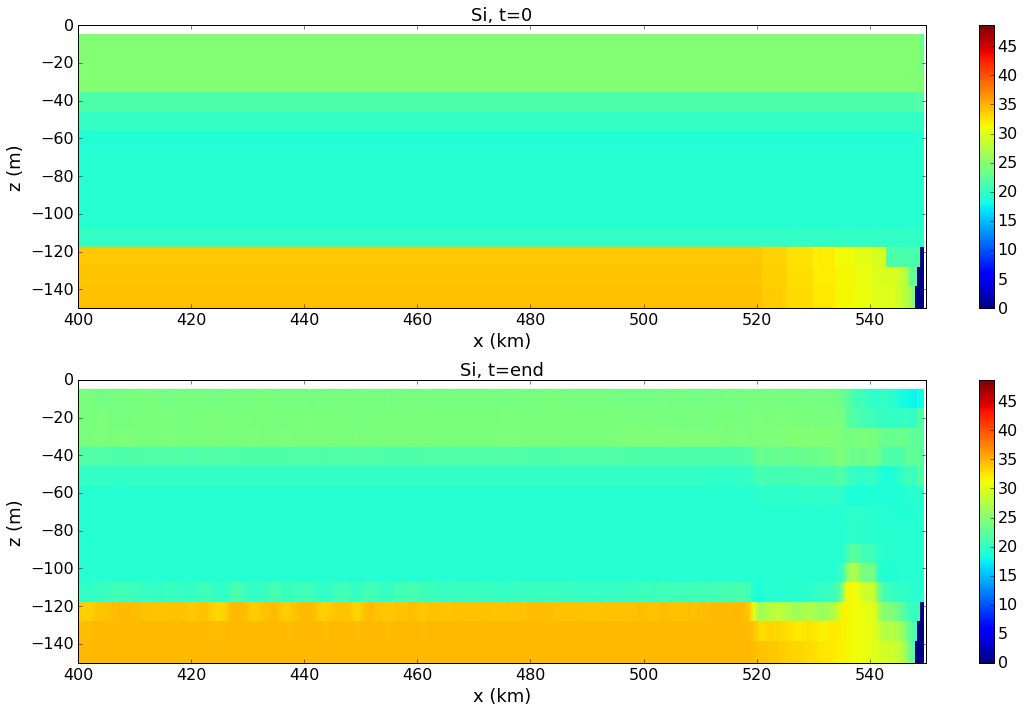

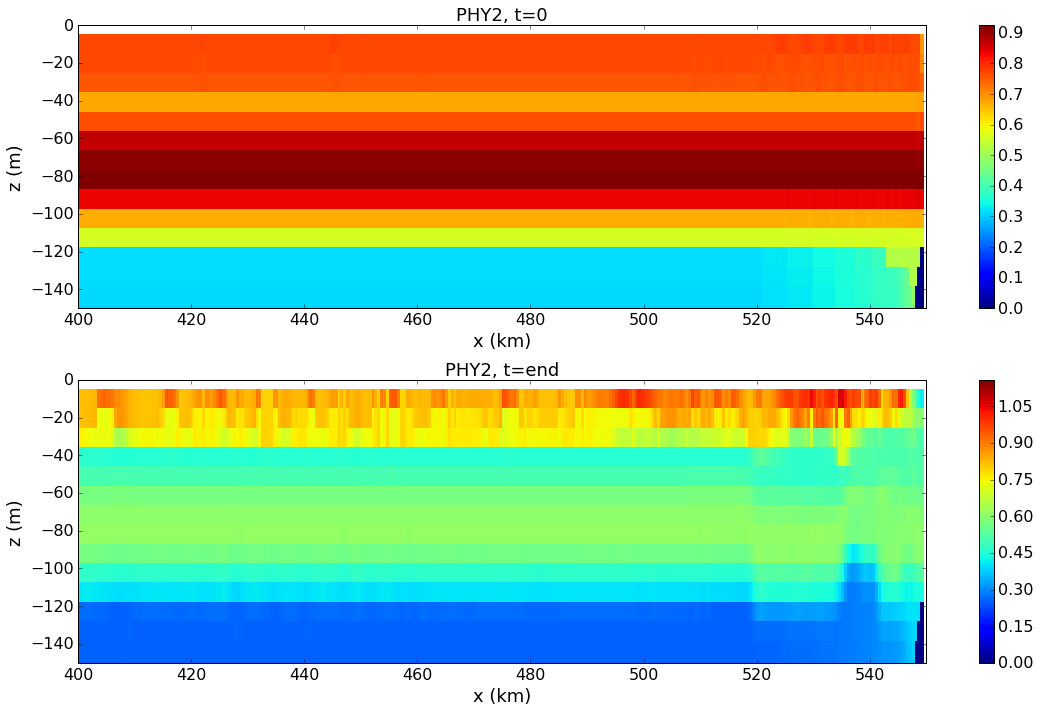

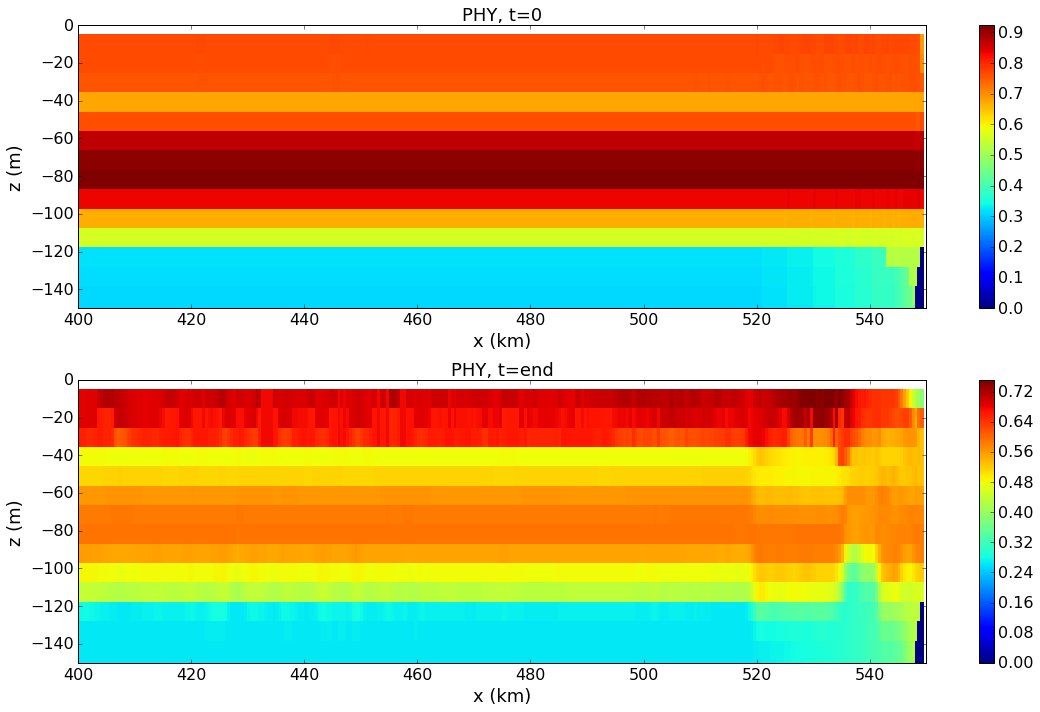

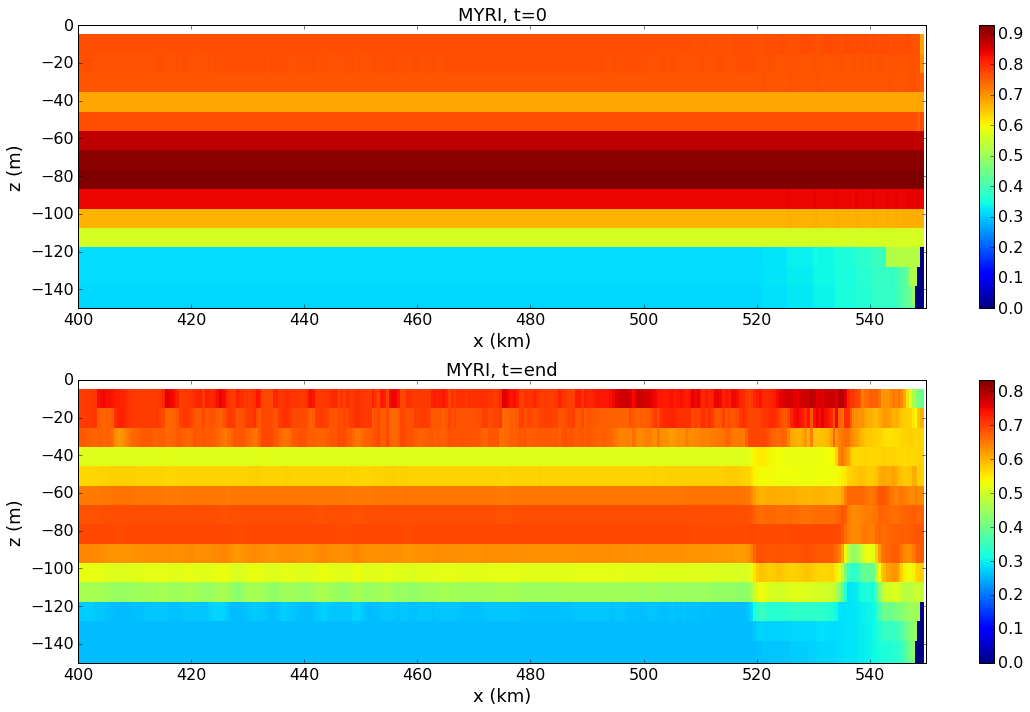

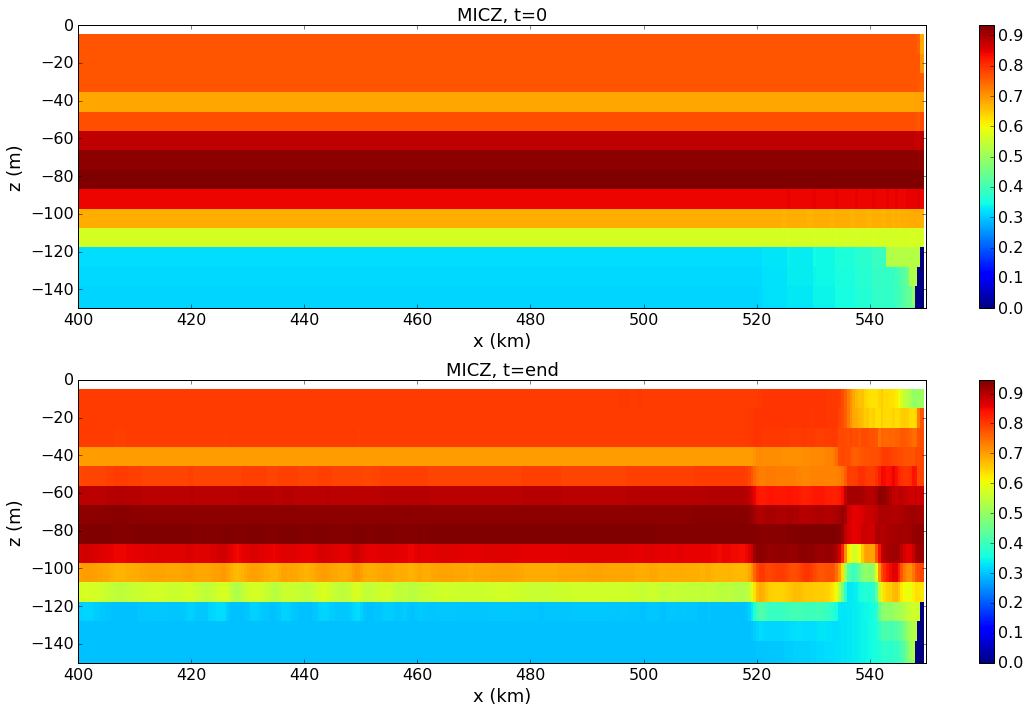

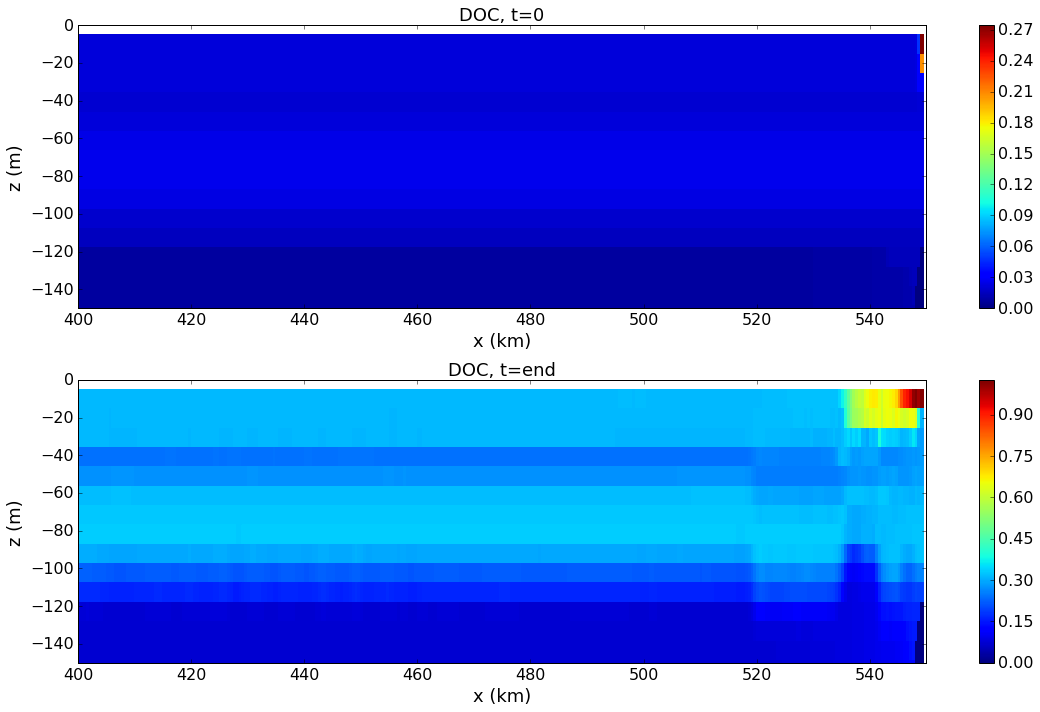

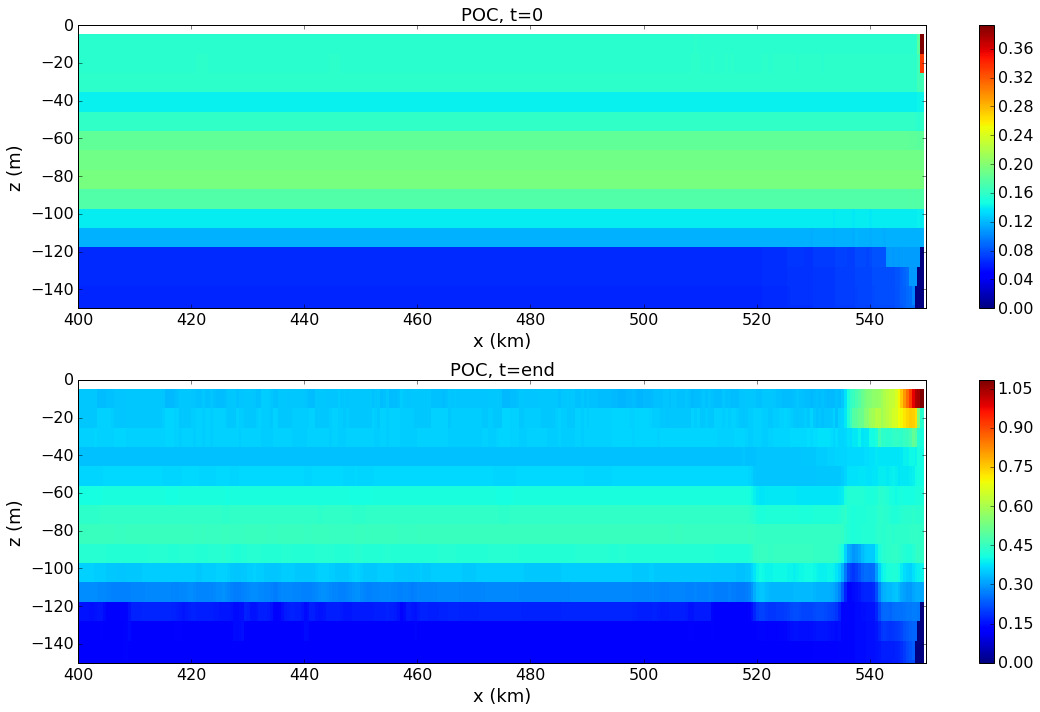

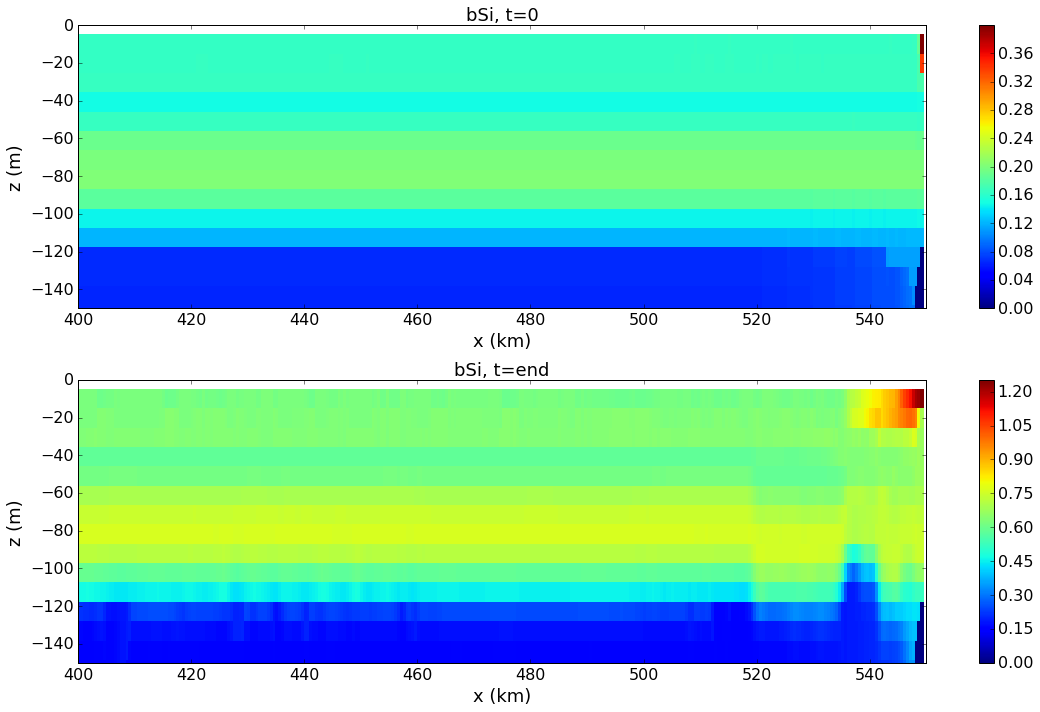

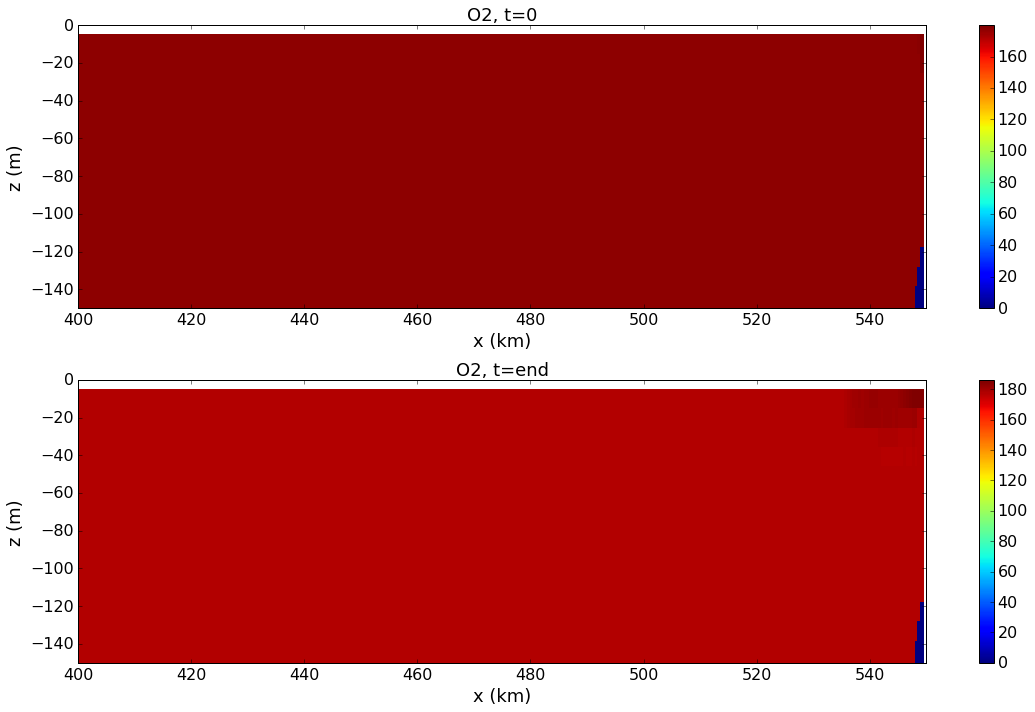

In [7]:
for ik in fkeys:
    if np.size(f.variables[ik].shape) == 4:
        fig, axs = plt.subplots(2,1,figsize=(16,10))
        print (ik)
        
        mesh0=axs[0].pcolormesh(xx,zz,f.variables[ik][0,:,5,:])
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('z (m)', fontsize=18)
        axs[0].set_xlabel('x (km)', fontsize=18)
        axs[0].set_title(ik + ', t=0', fontsize=18)
        #axs[0].autoscale(tight='True')
        #axs[0].axis([0, 550, -50, 0])
        axs[0].axis([400, 550, -150, 0])
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)

        mesh1=axs[1].pcolormesh(xx,zz,f.variables[ik][-1,:,5,:])
        cb1=fig.colorbar(mesh1,ax=axs[1])
        axs[1].set_ylabel('z (m)', fontsize=18)
        axs[1].set_xlabel('x (km)', fontsize=18)
        axs[1].set_title(ik + ', t=end', fontsize=18)
        #axs[1].autoscale(tight='True')
        #axs[1].axis([500, 550, -50, 0])
        axs[1].axis([400, 550, -150, 0])
        plt.setp(axs[1].get_xticklabels(),fontsize=16)
        plt.setp(axs[1].get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)
        plt.tight_layout()

In [17]:
#print(f.variables['O2'][23,1,:,1090:1099])
A=np.mean(f.variables['O2'][-1,1:2,5,1090:1099])
print(A)
B=np.mean(f.variables['O2'][0,1:2,5,1090:1099])
print(B)
print((A-B)/B*100,'%')

180.356
177.805
1.43455900252 %


In [9]:
print(f.variables['deptht'][:])

[   5.1282053    15.38461494   25.64102554   35.89743423   46.15384674
   56.41025543   66.66666412   76.92308044   87.17948914   97.43589783
  107.69230652  117.94871521  128.2051239   138.46153259  148.71794128
  158.97436523  169.23077393  179.48718262  189.74359131  200.
  210.25640869  220.51281738  230.76922607  241.02563477  251.28205872
  261.53845215  271.79486084  282.05126953  292.30767822  302.56411743
  312.82052612  323.07693481  333.33334351  343.5897522   353.84616089
  364.10256958  374.35897827  384.61538696  394.87179565  405.12820435]


In [10]:
print(f.variables['O2'][-1,1,5,1080:1099])
print(f.variables['O2'][-1,2,5,1080:1099])
print(f.variables['O2'][-1,3,5,1080:1099])
print(f.variables['O2'][-1,4,5,1080:1099])
print(f.variables['O2'][-1,5,5,1080:1099])

[ 181.70266724  181.51359558  181.75045776  181.73086548  181.09078979
  181.41383362  181.36451721  181.23701477  180.95976257  181.20219421
  181.08110046  180.76367188  180.58642578  180.64682007  181.07502747
  181.38452148  181.31890869  178.55935669  177.787323  ]
[ 177.87960815  177.77926636  177.88142395  178.72756958  178.32751465
  178.40492249  178.33258057  178.29377747  178.29550171  178.22966003
  178.1184845   177.94007874  177.94429016  177.85392761  177.93209839
  178.29115295  178.14653015  177.66882324  177.74145508]
[ 177.64126587  177.63876343  177.64871216  177.5390625   177.41447449
  177.28225708  177.19577026  177.25065613  177.31733704  177.37828064
  177.40367126  177.44447327  177.49595642  177.44410706  177.43919373
  177.48823547  177.47363281  177.56207275  177.57362366]
[ 177.58091736  177.57551575  177.57467651  177.58323669  177.59614563
  177.60375977  177.6088562   177.6008606   177.59078979  177.57844543
  177.56416321  177.56365967  177.54182434  1

NO3
NH4
Si
PHY2
PHY
MYRI
MICZ
DOC
POC
bSi
O2


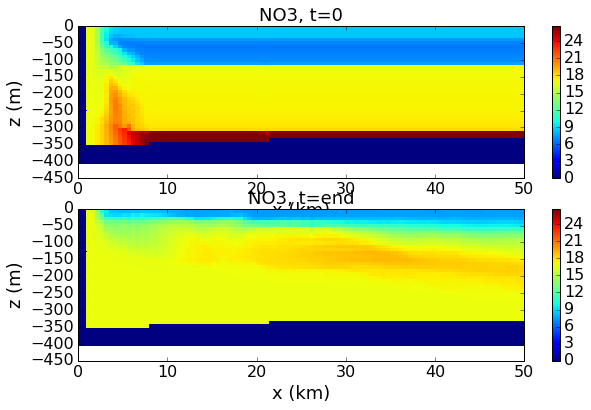

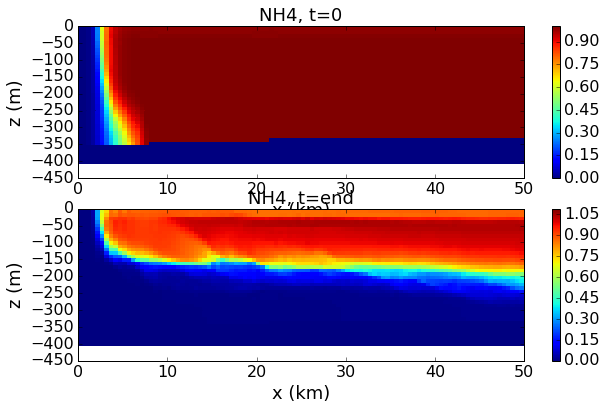

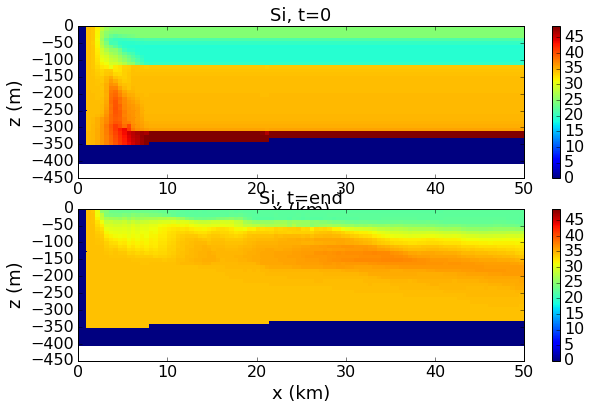

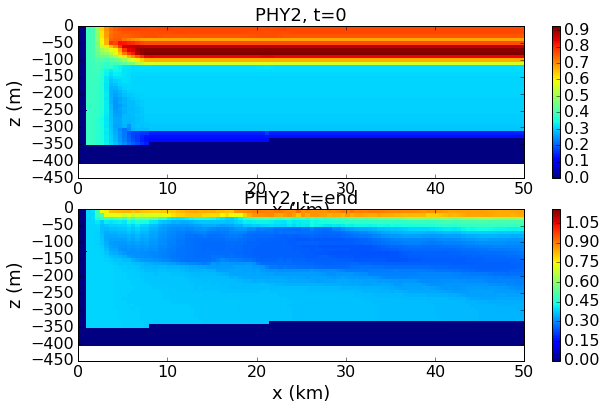

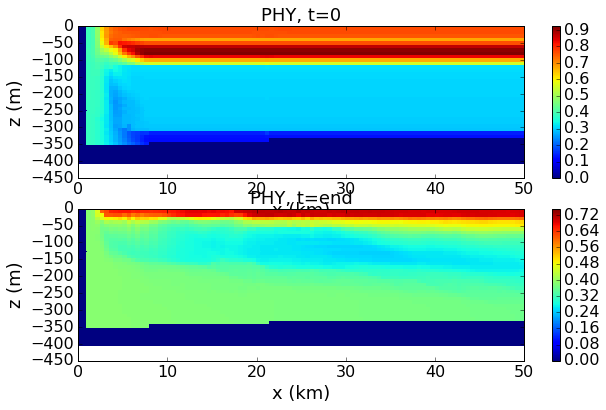

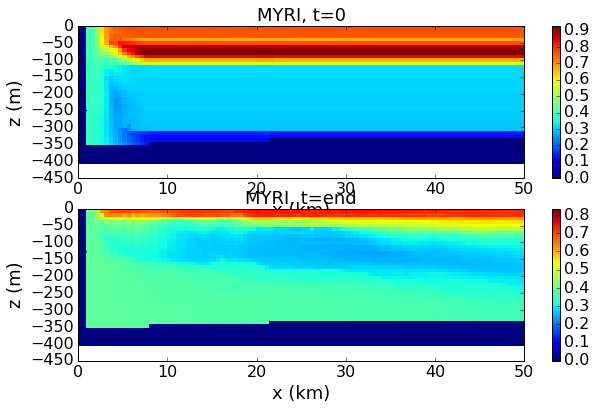

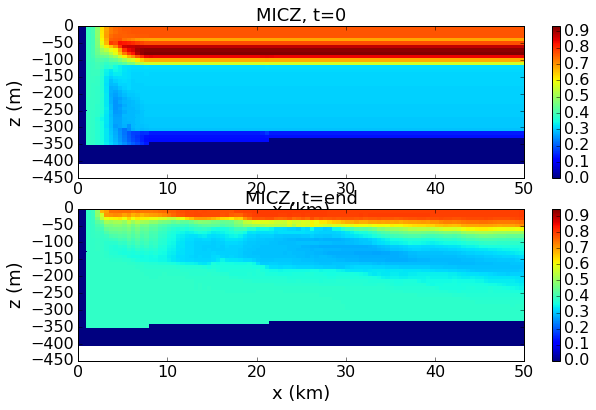

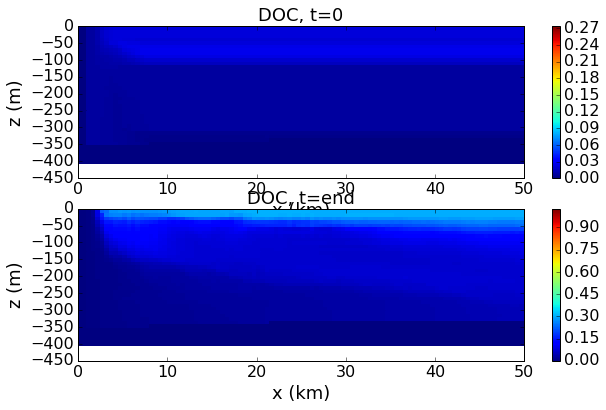

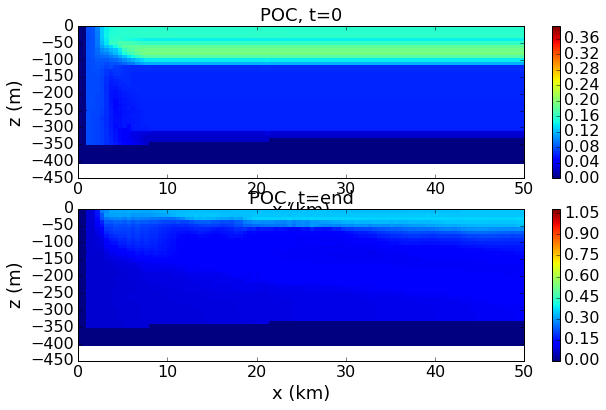

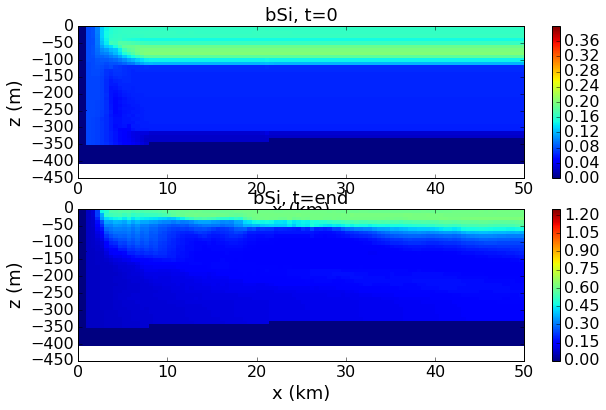

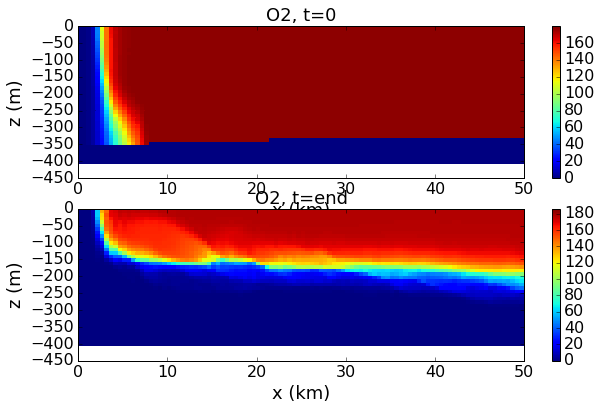

In [11]:
#zoom in:
for ik in fkeys:
    if np.size(f.variables[ik].shape) == 4:
        fig, axs = plt.subplots(2,1,figsize=(10,6))
        print (ik)
        
        mesh0=axs[0].pcolormesh(xx,zz,f.variables[ik][0,:,5,:])
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('z (m)', fontsize=18)
        axs[0].set_xlabel('x (km)', fontsize=18)
        axs[0].set_title(ik + ', t=0', fontsize=18)
        #axs[0].autoscale(tight='True')
        axs[0].axis([0, 50, -450, 0])
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)

        mesh1=axs[1].pcolormesh(xx,zz,f.variables[ik][-1,:,5,:])
        cb1=fig.colorbar(mesh1,ax=axs[1])
        axs[1].set_ylabel('z (m)', fontsize=18)
        axs[1].set_xlabel('x (km)', fontsize=18)
        axs[1].set_title(ik + ', t=end', fontsize=18)
        #axs[1].autoscale(tight='True')
        axs[1].axis([0, 50, -450, 0])
        plt.setp(axs[1].get_xticklabels(),fontsize=16)
        plt.setp(axs[1].get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)